## Preprocessing of data, Part 3C - replace the missing data

In this notebook will we work with the csv-file we created in part 2. But instead of removing rows that contains missing data  that we did in Part 3A and 3B, we will replace the missing data.

### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Uses csv-file with unwanted columns and data removed
df = pd.read_csv('germany_housing_data_part2_after_cleaning.csv')
df.head()

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition,Heating,Energy_source,State,Garagetype,Type,Price
0,106.00,229.0,5.5,3.0,1.0,2.0,2005.0,NaN,2.0,modernized,central heating,gas,Baden-Württemberg,Parking lot,Multiple dwelling,498000.0
1,140.93,517.0,6.0,3.0,2.0,NaN,1994.0,NaN,7.0,modernized,stove heating,NaN,Baden-Württemberg,Parking lot,Mid-terrace house,495000.0
2,162.89,82.0,5.0,3.0,2.0,4.0,2013.0,NaN,1.0,dilapidated,stove heating,other combinations of energy sources,Baden-Württemberg,Garage,Farmhouse,749000.0
3,140.00,814.0,4.0,NaN,2.0,2.0,1900.0,2000.0,1.0,fixer-upper,central heating,electricity,Baden-Württemberg,Garage,Farmhouse,259000.0
4,115.00,244.0,4.5,2.0,1.0,NaN,1968.0,2019.0,1.0,refurbished,central heating,oil,Baden-Württemberg,Garage,Multiple dwelling,469000.0


### First check of dataset

We start with a check of the dataset - what it contains and where the missing data is located. We also add a graph how much data is missing in the different columns.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10527 non-null  float64
 1   Lot             10527 non-null  float64
 2   Rooms           10527 non-null  float64
 3   Bedrooms        6854 non-null   float64
 4   Bathrooms       8726 non-null   float64
 5   Floors          7865 non-null   float64
 6   Year_built      9834 non-null   float64
 7   Year_renovated  5326 non-null   float64
 8   Garages         8573 non-null   float64
 9   Condition       10206 non-null  object 
 10  Heating         9946 non-null   object 
 11  Energy_source   9301 non-null   object 
 12  State           10526 non-null  object 
 13  Garagetype      8573 non-null   object 
 14  Type            10126 non-null  object 
 15  Price           10527 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


In [4]:
# Check how many unique categories a column with data type "object" contains
df.nunique()[9:15]

Condition        10
Heating          13
Energy_source    22
State            16
Garagetype        7
Type             11
dtype: int64

In [5]:
# Check how many post in each column has missing data
df.isnull().sum()

Living_space         0
Lot                  0
Rooms                0
Bedrooms          3673
Bathrooms         1801
Floors            2662
Year_built         693
Year_renovated    5201
Garages           1954
Condition          321
Heating            581
Energy_source     1226
State                1
Garagetype        1954
Type               401
Price                0
dtype: int64

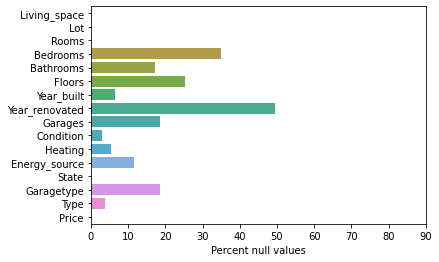

In [6]:
sns.barplot(x=df.isnull().sum()/df.shape[0] * 100, y=df.columns)
bins = np.arange(0, 100, 10)
plt.xlabel("Percent null values")
plt.xticks(bins)
plt.show()

### Replace missing values in numeric columns

In most of the numeric columns we chose to replace missing data with the columns mean-value.

Under the columns name, we will first show the number in the different categories. Then we will replace the missing data and show the number again.

If we chose a diffrent method, we will comment on that. 

#### Bedrooms

When we replace missing values in'Bedrooms' using mean-value, we have to check so that the value is not bigger than the value i the column 'Rooms'. So in smaller residences (the number of rooms being less than the mean-value for 'Bedrooms'), we have to replace missing data different.

In [7]:
df['Bedrooms'].value_counts()

3.0     1917
4.0     1754
5.0      857
2.0      834
6.0      544
1.0      285
7.0      238
8.0      163
9.0       73
10.0      51
12.0      34
11.0      22
14.0      11
13.0       9
16.0       8
15.0       8
21.0       7
0.0        6
18.0       6
17.0       5
20.0       4
19.0       4
26.0       3
30.0       3
24.0       1
61.0       1
31.0       1
44.0       1
25.0       1
36.0       1
29.0       1
40.0       1
Name: Bedrooms, dtype: int64

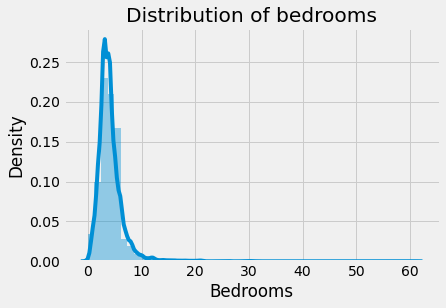

In [8]:
plt.style.use('fivethirtyeight')
x = pd.Series(df['Bedrooms'], name="Bedrooms")
plt.title('Distribution of bedrooms')
sns.distplot(x)
plt.show()

Before we do any changes in the column 'Bedrooms', we calculate the average ratio between 'Bedrooms' and 'Rooms'.

In a earlier test we had seen that mean-value for the column 'Bedrooms' is a little more than 4, so it is only in residences with 4 rooms or less this problem will present itself. To get the best ratio for replacing our missing data in these cases, we limited it to residences of this size when we calculated it.

In [9]:
num_of_rooms = df['Rooms'].values
num_of_bedrooms = df['Bedrooms'].values

In [10]:
diff = []

for i in range(len(num_of_rooms)):
    if not pd.isnull(num_of_bedrooms[i]):
        if num_of_rooms[i] <= 4:
            diff.append(num_of_bedrooms[i]/num_of_rooms[i])
          
ratio = np.mean(diff)
ratio

0.6478869895536563

After that we replaced all missing values based om the mean()-method.

In [11]:
# mean = 4.162387
df['Bedrooms'].fillna(df['Bedrooms'].mean(), inplace=True)
df['Bedrooms'].value_counts()[:10]

4.162387     3673
3.000000     1917
4.000000     1754
5.000000      857
2.000000      834
6.000000      544
1.000000      285
7.000000      238
8.000000      163
9.000000       73
10.000000      51
Name: Bedrooms, dtype: int64

Once it was done, we check how many cases we now have where the number of bedrooms is bigger than number of rooms.
We also create a list of the indexes in question.

In [12]:
strange_rows = 0
index_to_check = []
for i in range(len(num_of_rooms)):
    if num_of_bedrooms[i] > num_of_rooms[i]:
        strange_rows += 1
        index_to_check.append(i)
print(strange_rows)
print(index_to_check)

677
[3, 25, 45, 76, 77, 123, 148, 164, 176, 207, 252, 312, 343, 388, 402, 417, 426, 428, 445, 472, 482, 490, 492, 536, 545, 557, 695, 709, 718, 725, 726, 734, 736, 785, 786, 794, 798, 832, 873, 901, 935, 946, 990, 1024, 1034, 1092, 1136, 1154, 1202, 1291, 1345, 1370, 1378, 1380, 1404, 1435, 1511, 1545, 1572, 1576, 1606, 1615, 1645, 1646, 1656, 1670, 1684, 1696, 1711, 1741, 1745, 1753, 1766, 1775, 1776, 1791, 1828, 1835, 1960, 1998, 2006, 2015, 2028, 2030, 2046, 2053, 2063, 2065, 2081, 2085, 2099, 2101, 2104, 2112, 2120, 2133, 2141, 2149, 2234, 2245, 2259, 2288, 2289, 2422, 2443, 2480, 2520, 2525, 2533, 2618, 2628, 2630, 2632, 2633, 2634, 2644, 2667, 2671, 2683, 2684, 2701, 2712, 2721, 2742, 2756, 2757, 2765, 2767, 2768, 2771, 2772, 2779, 2793, 2809, 2844, 2846, 2853, 2860, 2868, 2900, 2903, 2909, 2930, 2931, 2933, 2954, 2968, 3005, 3011, 3028, 3034, 3035, 3036, 3040, 3045, 3060, 3067, 3071, 3090, 3093, 3094, 3100, 3101, 3102, 3113, 3117, 3122, 3140, 3147, 3149, 3154, 3167, 3168, 3175, 

It is 691 cases, where we replace the value of 'Bedrooms' with ratio * value of 'Rooms'.

In [13]:
for i in index_to_check:
    num_of_bedrooms[i] = ratio * num_of_rooms[i]

A check on the result of this as well as the final result on the whole column...

In [14]:
df.loc[index_to_check]

,Living_space,Lot,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Garages,Condition,Heating,Energy_source,State,Garagetype,Type,Price
3,140.0,814.0,4.0,2.591548,2.0,2.0,1900.0,2000.0,1.0,fixer-upper,central heating,electricity,Baden-Württemberg,Garage,Farmhouse,259000.0
25,115.0,239.0,4.0,2.591548,NaN,2.0,1969.0,NaN,NaN,refurbished,stove heating,oil,Baden-Württemberg,NaN,Farmhouse,430000.0
45,112.0,303.0,4.0,2.591548,NaN,2.0,1950.0,NaN,NaN,modernized,stove heating,oil,Baden-Württemberg,NaN,Duplex,235000.0
76,110.0,306.0,3.5,2.267604,NaN,2.0,1954.0,2019.0,NaN,renovated,central heating,electricity,Baden-Württemberg,NaN,Single dwelling,395000.0
77,100.0,3020.0,4.0,2.591548,NaN,NaN,1900.0,NaN,1.0,refurbished,underfloor heating,NaN,Baden-Württemberg,Garage,Mid-terrace house,210000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10436,120.0,632.0,4.0,2.591548,2.0,2.0,1930.0,NaN,1.0,modernized,stove heating,gas,Thüringen,Garage,Single dwelling,250000.0
10460,100.0,540.0,4.0,2.591548,2.0,2.0,1875.0,NaN,2.0,refurbished,central heating,oil,Thüringen,Carport,Mid-terrace house,50000.0
10473,600.0,5000.0,1.0,0.647887,NaN,NaN,1830.0,NaN,NaN,refurbished,stove heating,coal,Thüringen,NaN,Corner house,230000.0
10502,85.0,219.0,3.0,1.943661,1.0,3.0,1900.0,2017.0,1.0,first occupation,underfloor heating,wood,Thüringen,Garage,Mid-terrace house,80000.0


In [15]:
df['Bedrooms'].value_counts()

4.162387     2996
3.000000     1917
4.000000     1754
5.000000      857
2.000000      834
6.000000      544
2.591548      439
1.000000      285
7.000000      238
8.000000      163
1.943661      140
9.000000       73
10.000000      51
1.295774       38
12.000000      34
0.647887       29
2.267604       26
11.000000      22
14.000000      11
13.000000       9
15.000000       8
16.000000       8
21.000000       7
0.000000        6
18.000000       6
17.000000       5
1.619717        5
19.000000       4
20.000000       4
30.000000       3
26.000000       3
44.000000       1
25.000000       1
31.000000       1
61.000000       1
36.000000       1
29.000000       1
40.000000       1
24.000000       1
Name: Bedrooms, dtype: int64

#### Bathrooms

'Bathrooms' is not a part of 'Rooms', so we just replace with the mean()-method.
We show the values before and after our change.

In [16]:
df['Bathrooms'].value_counts()

2.0     3545
1.0     2526
3.0     1617
4.0      544
5.0      192
6.0      124
8.0       38
7.0       37
10.0      29
9.0       23
13.0      11
0.0        8
11.0       6
12.0       6
18.0       3
14.0       3
17.0       2
24.0       2
22.0       1
16.0       1
44.0       1
25.0       1
20.0       1
26.0       1
40.0       1
15.0       1
21.0       1
36.0       1
Name: Bathrooms, dtype: int64

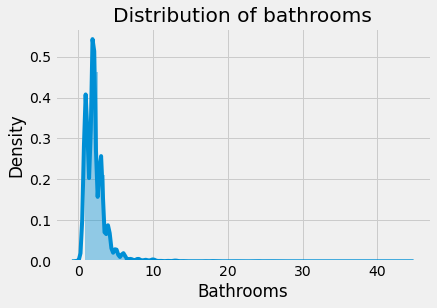

In [17]:
plt.style.use('fivethirtyeight')
x = pd.Series(df['Bathrooms'], name="Bathrooms")
plt.title('Distribution of bathrooms')
sns.distplot(x)
plt.show()

In [18]:
# mean = 2.307014
df['Bathrooms'].fillna(df['Bathrooms'].mean(), inplace=True)
df['Bathrooms'].value_counts()[:10]

2.000000     3545
1.000000     2526
2.307014     1801
3.000000     1617
4.000000      544
5.000000      192
6.000000      124
8.000000       38
7.000000       37
10.000000      29
Name: Bathrooms, dtype: int64

#### Floors

In [19]:
df['Floors'].value_counts()

2.0     3996
3.0     2316
1.0     1070
4.0      394
5.0       52
0.0       21
6.0       11
8.0        2
7.0        2
13.0       1
Name: Floors, dtype: int64

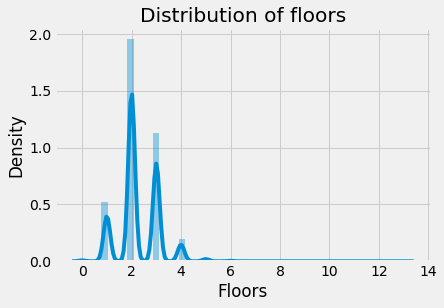

In [20]:
plt.style.use('fivethirtyeight')
x = pd.Series(df['Floors'], name="Floors")
plt.title('Distribution of floors')
sns.distplot(x)
plt.show()

In [21]:
# mean = 2.282899
df['Floors'].fillna(df['Floors'].mean(), inplace=True)
df['Floors'].value_counts().head(10)

2.000000    3996
2.282899    2662
3.000000    2316
1.000000    1070
4.000000     394
5.000000      52
0.000000      21
6.000000      11
8.000000       2
7.000000       2
Name: Floors, dtype: int64

#### Year_built

In [22]:
df['Year_built'].value_counts()

1900.0    492
1960.0    193
2020.0    167
2000.0    166
1978.0    163
         ... 
1836.0      1
1783.0      1
1741.0      1
1500.0      1
1698.0      1
Name: Year_built, Length: 292, dtype: int64

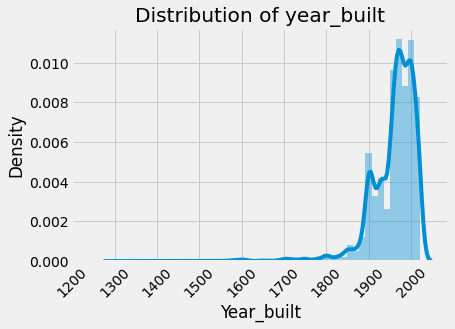

In [23]:
plt.style.use('fivethirtyeight')
x = pd.Series(df['Year_built'], name="Year_built")
plt.title('Distribution of year_built')
sns.distplot(x)
bins_ = np.arange(1200, 2025, 100)
plt.xticks(bins_)
plt.tick_params(axis='x', rotation=45)
plt.show()

In [24]:
# mean = 1958.832011
df['Year_built'].fillna(df['Year_built'].mean(), inplace=True)
df['Year_built'].value_counts().head(10)

1958.832011    693
1900.000000    492
1960.000000    193
2020.000000    167
2000.000000    166
1978.000000    163
1972.000000    155
1920.000000    151
1950.000000    151
1970.000000    146
Name: Year_built, dtype: int64

#### Year_renovated

When it comes to replacing the missing values in the column 'Year_renovated', we chose a different method. There were two main reasons for this:

1 - We felt that this field may been left empty in houses that had not been renovated.

2 - Using the mean value to replace missing data could result in rows where the value in 'Year_renovated' gives a year that is earlier than 'Year_built'.

At this point there is no missing data in 'Year_built'.


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10527 non-null  float64
 1   Lot             10527 non-null  float64
 2   Rooms           10527 non-null  float64
 3   Bedrooms        10527 non-null  float64
 4   Bathrooms       10527 non-null  float64
 5   Floors          10527 non-null  float64
 6   Year_built      10527 non-null  float64
 7   Year_renovated  5326 non-null   float64
 8   Garages         8573 non-null   float64
 9   Condition       10206 non-null  object 
 10  Heating         9946 non-null   object 
 11  Energy_source   9301 non-null   object 
 12  State           10526 non-null  object 
 13  Garagetype      8573 non-null   object 
 14  Type            10126 non-null  object 
 15  Price           10527 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


In [26]:
df['Year_renovated'].value_counts()

2019.0    659
2018.0    579
2017.0    422
2020.0    353
2015.0    346
         ... 
1900.0      1
1955.0      1
1947.0      1
1935.0      1
1969.0      1
Name: Year_renovated, Length: 63, dtype: int64

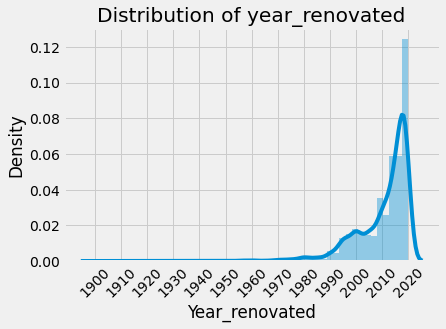

In [27]:
plt.style.use('fivethirtyeight')
x = pd.Series(df['Year_renovated'], name="Year_renovated")
plt.title('Distribution of year_renovated')
sns.distplot(x)
bins_ = np.arange(1900, 2025, 10)
plt.xticks(bins_)
plt.tick_params(axis='x', rotation=45)
plt.show()

In [28]:
df['Year_renovated'].fillna(df['Year_built'], inplace=True)
df['Year_renovated'].value_counts()

2019.0    752
2018.0    646
2020.0    497
2017.0    494
2015.0    397
         ... 
1834.0      1
1644.0      1
1809.0      1
1820.0      1
1698.0      1
Name: Year_renovated, Length: 219, dtype: int64

#### Garages

We felt that a large part of the missing data in this column could be that the house does not have any parking. 
The reason for this is that this option is not in the dataset.

In [29]:
df['Garages'].value_counts()

1.0     3094
2.0     2719
3.0     1013
4.0      678
5.0      362
6.0      257
8.0       96
7.0       85
10.0      78
12.0      30
9.0       25
11.0      22
20.0      21
14.0      14
15.0      14
16.0      12
17.0       8
13.0       8
30.0       7
27.0       4
50.0       3
21.0       3
25.0       3
18.0       2
40.0       2
22.0       2
49.0       1
58.0       1
31.0       1
28.0       1
70.0       1
60.0       1
36.0       1
26.0       1
23.0       1
45.0       1
65.0       1
Name: Garages, dtype: int64

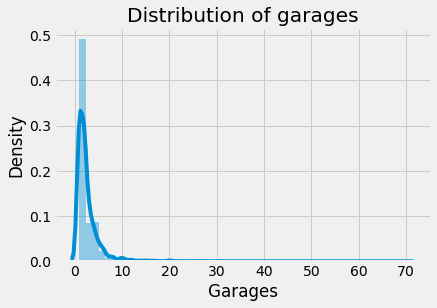

In [30]:
plt.style.use('fivethirtyeight')
x = pd.Series(df['Garages'], name="Garages")
plt.title('Distribution of garages')
sns.distplot(x)
plt.show()

We chose to replace missing data with the value 0.

In [31]:
df['Garages'].fillna(0, inplace=True)
df['Garages'].value_counts()

1.0     3094
2.0     2719
0.0     1954
3.0     1013
4.0      678
5.0      362
6.0      257
8.0       96
7.0       85
10.0      78
12.0      30
9.0       25
11.0      22
20.0      21
14.0      14
15.0      14
16.0      12
17.0       8
13.0       8
30.0       7
27.0       4
50.0       3
21.0       3
25.0       3
18.0       2
22.0       2
40.0       2
58.0       1
36.0       1
70.0       1
31.0       1
26.0       1
23.0       1
60.0       1
49.0       1
45.0       1
28.0       1
65.0       1
Name: Garages, dtype: int64

### Replacing missing values in non-numeric columns

In most of the non-numeric columns we chose to replace missing data with the most common category. Under the columns name, we will first show the number in the different categories. Then we will replace the missing data and show the number again.

If we chose a diffrent method, we will comment on that. 

#### Condition

In [32]:
df['Condition'].value_counts()

modernized                              4431
refurbished                             1303
dilapidated                             1166
maintained                              1067
renovated                               1031
fixer-upper                              585
first occupation after refurbishment     460
first occupation                          97
by arrangement                            54
as new                                    12
Name: Condition, dtype: int64

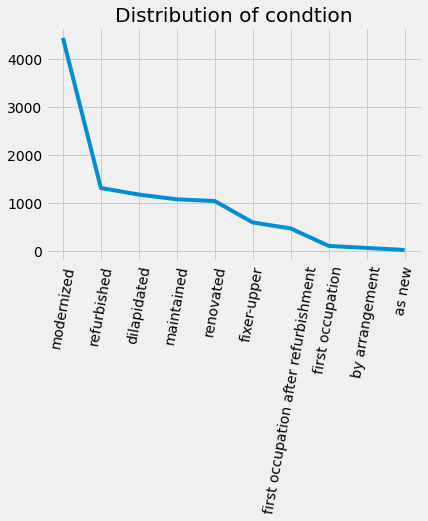

In [33]:
plt.style.use('fivethirtyeight')
plt.title('Distribution of condtion')
plt.plot(df['Condition'].value_counts())
plt.tick_params(axis='x', rotation=80)
plt.show()

In [34]:
# Most common value = 'modernized'
df['Condition'].fillna(df['Condition'].value_counts().index[0], inplace=True)
df['Condition'].value_counts()

modernized                              4752
refurbished                             1303
dilapidated                             1166
maintained                              1067
renovated                               1031
fixer-upper                              585
first occupation after refurbishment     460
first occupation                          97
by arrangement                            54
as new                                    12
Name: Condition, dtype: int64

#### Heating

In [35]:
df['Heating'].value_counts()

stove heating           5960
heat pump                982
central heating          893
oil heating              746
underfloor heating       417
night storage heater     322
district heating         229
wood-pellet heating      115
electric heating          95
floor heating             95
gas heating               51
cogeneration units        23
solar heating             18
Name: Heating, dtype: int64

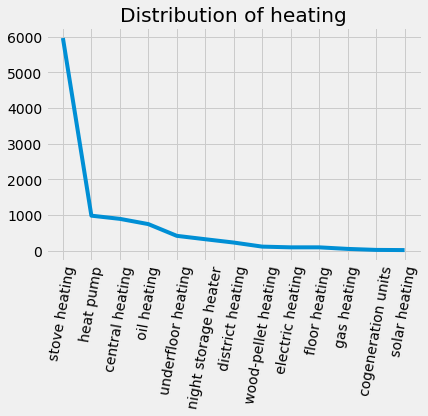

In [36]:
plt.style.use('fivethirtyeight')
plt.title('Distribution of heating')
plt.plot(df['Heating'].value_counts())
plt.tick_params(axis='x', rotation=80)
plt.show()

In [37]:
# Most common value = 'stove heating'
df['Heating'].fillna(df['Heating'].value_counts().index[0], inplace=True)
df['Heating'].value_counts()

stove heating           6541
heat pump                982
central heating          893
oil heating              746
underfloor heating       417
night storage heater     322
district heating         229
wood-pellet heating      115
electric heating          95
floor heating             95
gas heating               51
cogeneration units        23
solar heating             18
Name: Heating, dtype: int64

#### Energy_source

In this column there were over 100 unique values - we reduced them in notebook Pre_processing part 1.

In [38]:
df['Energy_source'].value_counts()

gas                                     4516
oil                                     2567
electricity                              553
other combinations of energy sources     205
district heating                         180
natural gas light                        175
wood pellets                             156
geothermal energy                        137
wood                                     117
liquefied petroleum gas                  108
other energy source                       79
solar, gas                                77
oil, wood                                 63
environmental heat                        63
natural gas heavy                         55
gas, wood                                 47
solar                                     40
oil, electricity                          37
gas, electricity                          35
solar, oil                                34
electricity, wood                         32
coal                                      25
Name: Ener

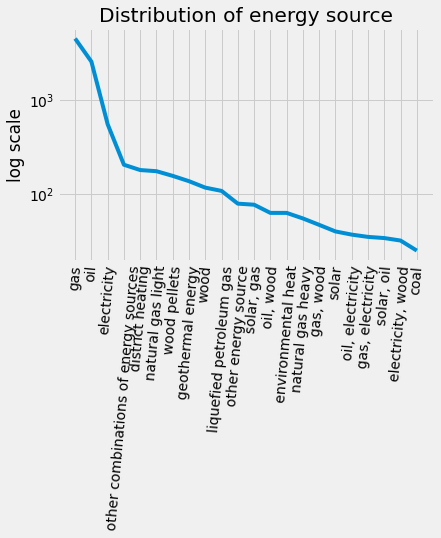

In [39]:
plt.style.use('fivethirtyeight')
plt.yscale("log")
plt.title('Distribution of energy source')
plt.plot(df['Energy_source'].value_counts())
plt.ylabel("log scale")
plt.tick_params(axis='x', rotation=85)
plt.show()

In [40]:
# Most common value = 'gas'
df['Energy_source'].fillna(df['Energy_source'].value_counts().index[0], inplace=True)
df['Energy_source'].value_counts()

gas                                     5742
oil                                     2567
electricity                              553
other combinations of energy sources     205
district heating                         180
natural gas light                        175
wood pellets                             156
geothermal energy                        137
wood                                     117
liquefied petroleum gas                  108
other energy source                       79
solar, gas                                77
oil, wood                                 63
environmental heat                        63
natural gas heavy                         55
gas, wood                                 47
solar                                     40
oil, electricity                          37
gas, electricity                          35
solar, oil                                34
electricity, wood                         32
coal                                      25
Name: Ener

#### State

In [41]:
df['State'].value_counts()

Nordrhein-Westfalen       1655
Bayern                    1339
Baden-Württemberg         1296
Niedersachsen             1296
Rheinland-Pfalz           1023
Hessen                     964
Schleswig-Holstein         553
Sachsen                    543
Brandenburg                490
Sachsen-Anhalt             376
Mecklenburg-Vorpommern     365
Berlin                     212
Saarland                   172
Thüringen                  147
Bremen                      49
Hamburg                     46
Name: State, dtype: int64

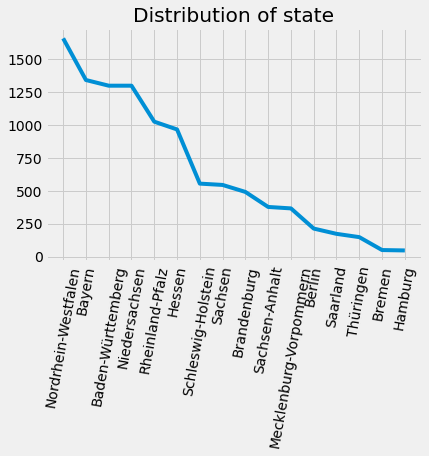

In [42]:
plt.style.use('fivethirtyeight')
plt.title('Distribution of state')
plt.plot(df['State'].value_counts())
plt.tick_params(axis='x', rotation=80)
plt.show()

In [43]:
# Most common value = 'Nordrhein-Westfalen'
df['State'].fillna(df['State'].value_counts().index[0], inplace=True)
df['State'].value_counts()

Nordrhein-Westfalen       1656
Bayern                    1339
Baden-Württemberg         1296
Niedersachsen             1296
Rheinland-Pfalz           1023
Hessen                     964
Schleswig-Holstein         553
Sachsen                    543
Brandenburg                490
Sachsen-Anhalt             376
Mecklenburg-Vorpommern     365
Berlin                     212
Saarland                   172
Thüringen                  147
Bremen                      49
Hamburg                     46
Name: State, dtype: int64

#### GarageType

We felt that a large part of the missing data in this column could be that the house does not have any parking. 
The reason for this is that this option is not in the dataset.

In [44]:
df['Garagetype'].value_counts()

Garage                     4407
Outside parking lot        1686
Parking lot                1600
Carport                     732
Underground parking lot      95
Duplex lot                   47
Car park lot                  6
Name: Garagetype, dtype: int64

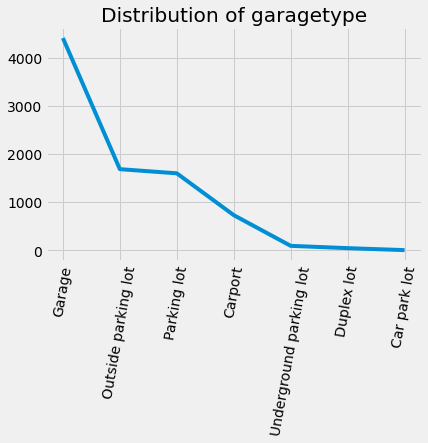

In [45]:
plt.style.use('fivethirtyeight')
plt.title('Distribution of garagetype')
plt.plot(df['Garagetype'].value_counts())
plt.tick_params(axis='x', rotation=80)
plt.show()

Therefor we will replace missing data with a new category - 'No parking'.

In [46]:
df['Garagetype'].fillna('No parking', inplace=True)
df['Garagetype'].value_counts()

Garage                     4407
No parking                 1954
Outside parking lot        1686
Parking lot                1600
Carport                     732
Underground parking lot      95
Duplex lot                   47
Car park lot                  6
Name: Garagetype, dtype: int64

#### Type

In [47]:
df['Type'].value_counts()

Mid-terrace house       4314
Duplex                  2117
Single dwelling         1167
Farmhouse                573
Villa                    395
Multiple dwelling        379
Residential property     367
Special property         358
Bungalow                 248
Corner house             201
Castle                     7
Name: Type, dtype: int64

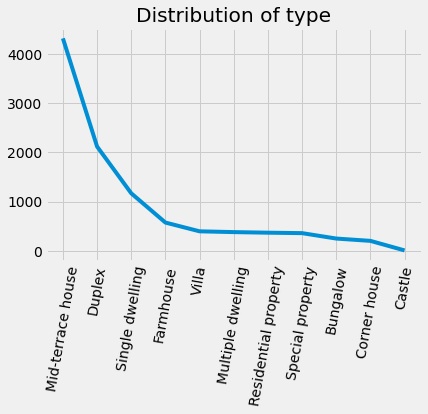

In [48]:
plt.style.use('fivethirtyeight')
plt.title('Distribution of type')
plt.plot(df['Type'].value_counts())
plt.tick_params(axis='x', rotation=80)
plt.show()

In [49]:
# Most common value = 'Mid-terrace house'
df['Type'].fillna(df['Type'].value_counts().index[0], inplace=True)
df['Type'].value_counts()

Mid-terrace house       4715
Duplex                  2117
Single dwelling         1167
Farmhouse                573
Villa                    395
Multiple dwelling        379
Residential property     367
Special property         358
Bungalow                 248
Corner house             201
Castle                     7
Name: Type, dtype: int64

### Final check

We check that we no longer have any missing data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10527 entries, 0 to 10526
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Living_space    10527 non-null  float64
 1   Lot             10527 non-null  float64
 2   Rooms           10527 non-null  float64
 3   Bedrooms        10527 non-null  float64
 4   Bathrooms       10527 non-null  float64
 5   Floors          10527 non-null  float64
 6   Year_built      10527 non-null  float64
 7   Year_renovated  10527 non-null  float64
 8   Garages         10527 non-null  float64
 9   Condition       10527 non-null  object 
 10  Heating         10527 non-null  object 
 11  Energy_source   10527 non-null  object 
 12  State           10527 non-null  object 
 13  Garagetype      10527 non-null  object 
 14  Type            10527 non-null  object 
 15  Price           10527 non-null  float64
dtypes: float64(10), object(6)
memory usage: 1.3+ MB


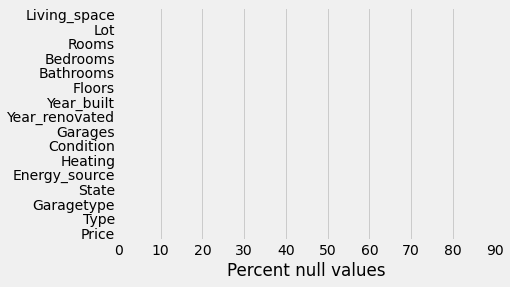

In [51]:
sns.barplot(x=df.isnull().sum()/df.shape[0] * 100, y=df.columns)
plt.xlabel("Percent null values")
plt.xticks(bins)
plt.show()

### Saving the changes

We save our changes to a new csv-file for the next step in our preprocessing of data

In [52]:
df.to_csv('germany_housing_data_part3C_imputing_missing_values.csv', index=False)